# Data analysis for the ISMAR article

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.formula.api import ols

from ast import literal_eval
from os import listdir
from os.path import join

Configurations:

In [261]:
sns.set_style('darkgrid')
blue, green, red = sns.color_palette()[0], sns.color_palette()[1], sns.color_palette()[2]

Load the csv data files:

In [286]:
data_path = 'data/'

# Participants information & trials
participants = pd.read_csv(join(data_path, 'participants.csv'))
trials = pd.read_csv(join(data_path, 'participants_trials.csv'))

# Participants details
details = []
for file in listdir(data_path):
    if file.endswith('details.csv'): # The trial files end with *-details.csv
        details.append(pd.read_csv(join(data_path, file)))
details = pd.concat(details, ignore_index=True)

# Independent variables
techniques = trials.drop_duplicates('technique_id').loc[:, ['technique_id', 'technique_name']].reset_index(drop=True)
text_size = trials.drop_duplicates('text_size_id').loc[:, ['text_size_id', 'text_size_name']].reset_index(drop=True)
distance = trials.drop_duplicates('distance_id').loc[:, ['distance_id', 'distance_name']].reset_index(drop=True)
techniques.columns = text_size.columns = distance.columns = ['id', 'name']

# Participants rates (from participants information)

In [312]:
print(participants.iloc[0][0:13].tolist())
participants.apply(lambda participant: print(participant[0:1].tolist()))

[0, 'M', True, False, False, '21-25', 'right', 'right', 'Augmented Reality Master Student', 9, '[video games, Unity 3D]', '[HoloLens, Oculus DK2, HTC Vive, Oculus Rift, Google Cardboard]', '[controllers, gaze, tap, leap]']
[0]
['M']
[True]
[False]
[False]
['21-25']
['right']
['right']
['Augmented Reality Master Student']
[9]
['[video games, Unity 3D]']
['[HoloLens, Oculus DK2, HTC Vive, Oculus Rift, Google Cardboard]']
['[controllers, gaze, tap, leap]']
[0]
['[5,5,4]']
['[3,5,4]']
['[4,5,3]']
['[3,5,3]']
['[4,5,3]']
['[3,5,2]']
['[2,1,3]']


participant_id            None
sex                       None
glasses                   None
contact_lenses            None
color_blind               None
age                       None
dominant_hand             None
mouse_hand                None
activity                  None
computer_hours_day        None
softwares_3d              None
hmd_used                  None
hmd_interactions          None
ordering                  None
easy_understand           None
mentally_easy_use         None
physically_easy_use       None
could_go_fast             None
subjective_performance    None
frustration               None
preference                None
dtype: object

In [321]:
rates = []
for index, participant in participants.iterrows():
    for i in range(len(rate)):
        technique_id= i+1
        for rate_data in participant[14:21]
            rate = literal_eval(participant[rate_label])
            rates.append(participant[0:13].tolist() + [technique_id] + .tolist())
rates = pd.DataFrame(rates, columns=participants.columns[0:13].tolist() + ['technique_id'] + participants.columns[14:21].tolist())

print(rates.head())

   participant_id sex  glasses  contact_lenses  color_blind    age  \
0               0   M     True           False        False  21-25   
1               0   M     True           False        False  21-25   
2               0   M     True           False        False  21-25   
3               1   F     True           False        False  46-50   
4               1   F     True           False        False  46-50   

  dominant_hand mouse_hand                          activity  \
0         right      right  Augmented Reality Master Student   
1         right      right  Augmented Reality Master Student   
2         right      right  Augmented Reality Master Student   
3         right      right                   Project Manager   
4         right      right                   Project Manager   

   computer_hours_day    ...      \
0                   9    ...       
1                   9    ...       
2                   9    ...       
3                   6    ...       
4             

Analysis of rates of the participants:

In [285]:
def getParticipantsRates(rate_label, partipants_column_labels=[]):
    partipant_columns = []
    for label in ['participant_id'] + partipants_column_labels:
        partipant_columns.append(participants[label])
    
    rates = []
    for index, participant in participants.iterrows():
        rate = literal_eval(participant[rate_label])
        for i in range(len(rate)):
            technique_id= i+1
            rates.append(partipant_columns + [technique_id, rate[i]])
            
    rates = pd.DataFrame(rates, columns=partipants_column_labels + ['technique_id', 'rate'])
    return rates

print(getParticipantsRates('preference', ['ordering']))

AssertionError: 3 columns passed, passed data had 4 columns

In [270]:
preferences = getParticipantsRates('preference')
#sns.factorplot(x='rate', col='technique_id', row='ordering', data=preferences, kind='count', palette='RdBu_r');

TypeError: list indices must be integers or slices, not str

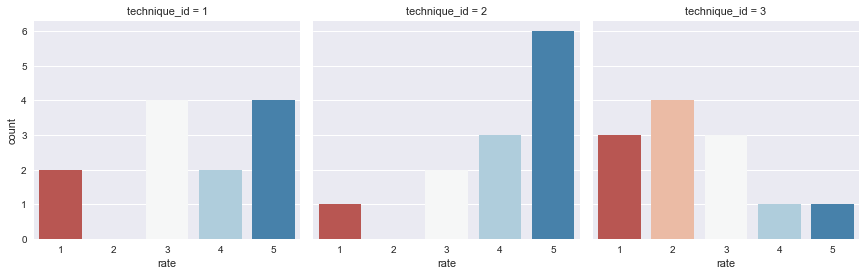

In [265]:
for rate_label in ['frustration']:
    rates = getParticipantsRates(rate_label)
    sns.factorplot(x='rate', col='technique_id', data=rates, kind='count', palette='RdBu');